To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [52]:
# Importing necessory libraries

In [53]:
import tensorflow as tf
import numpy as np
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [54]:
train_data_path = pathlib.Path("/content/drive/MyDrive/cnn/CNN_assignment/Skin_cancer_images/Train")
test_data_path = pathlib.Path("/content/drive/MyDrive/cnn/CNN_assignment/Skin_cancer_images/Test")

In [55]:
import os
image_count_train = len(list(train_data_path.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(test_data_path.glob('*/*.jpg')))
print(image_count_test)

2251
118


Loading using Keras for preprocessing and creating a dataset.

In [56]:
batch_size = 32
img_height = 180
img_width = 180

From the dataset, We are using for both training and validation purpose.

In [57]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split=0.2,
    subset="training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size

)

Found 2251 files belonging to 9 classes.
Using 1801 files for training.


In [51]:
vald_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split=0.2,
    subset="validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size

)

Found 2251 files belonging to 9 classes.
Using 450 files for validation.


In [58]:
class_names = train_dataset.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualising the data

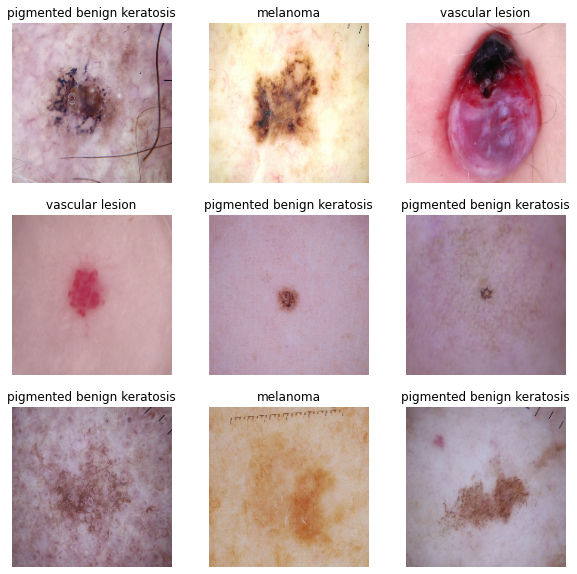

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    x = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [60]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
vald_dataset = vald_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Creating the model, to detect the 9 classes, that are represent in the dataset

In [61]:
num_classes = 9
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

#model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
#model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
#model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
#model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
#model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 90, 90, 64)       256       
 hNormalization)                                      

Compilation of the model and creating a optimizater

In [62]:
optimizer = 'adam'
loss_func = "binary_crossentropy"
model.compile(optimizer = optimizer,
              loss = loss_func,
              metrics = ['accuracy'])

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 90, 90, 64)       256       
 hNormalization)                                      

In [64]:
# Training the model
epochs = 20
batch_size = 32

history = model.fit(
  train_dataset,
  validation_data=vald_dataset,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 21s 153ms/step - loss: -81928.9453 - accuracy: 0.1699 - val_loss: -22576.4043 - val_accuracy: 0.1511
Epoch 2/20
57/57 [==============================] - 4s 76ms/step - loss: -711480.9375 - accuracy: 0.1710 - val_loss: -306685.7188 - val_accuracy: 0.1511
Epoch 3/20
57/57 [==============================] - 4s 76ms/step - loss: -2616592.7500 - accuracy: 0.1710 - val_loss: -1419225.6250 - val_accuracy: 0.1511
Epoch 4/20
57/57 [==============================] - 4s 77ms/step - loss: -6511949.0000 - accuracy: 0.1710 - val_loss: -4782328.0000 - val_accuracy: 0.1511
Epoch 5/20
57/57 [==============================] - 4s 77ms/step - loss: -13263298.0000 - accuracy: 0.1710 - val_loss: -9253606.0000 - val_accuracy: 0.1511
Epoch 6/20
57/57 [==============================] - 4s 77ms/step - loss: -23368794.0000 - accuracy: 0.1710 - val_loss: -15682526.0000 - val_accuracy: 0.1511
Epoch 7/20
57/57 [==============================] - 4s 77ms/step - loss

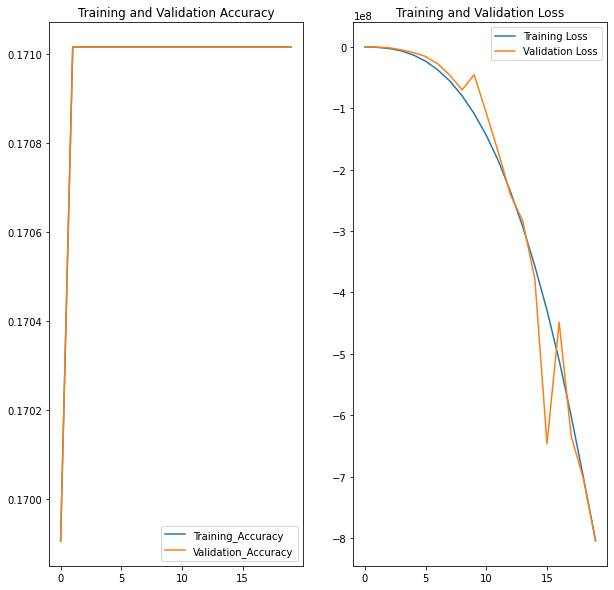

In [65]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training_Accuracy')
plt.plot(epochs_range, acc, label = 'Validation_Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
# Need to Identify, whether it is underfit or overfit
loss, accuracy = model.evaluate(train_dataset, verbose = 1,)
val_loss, accuracy_val = model.evaluate(vald_dataset, verbose = 1)
print("Accuracy", accuracy)
print("validation_Accuracy", accuracy_val)
print("Loss", loss)
print("Validation_loss", val_loss)




15/15 [==============================] - 0s 18ms/step - loss: -805147136.0000 - accuracy: 0.1511
Accuracy 0.17101609706878662
validation_Accuracy 0.15111111104488373
Loss -808690560.0
Validation_loss -805147136.0


In [67]:
#data_generator = ImageDataGenerator(
 #   featurewise_center = False,
  # featurewise_std_normalization = False,
   # samplewise_std_normalization = False,
    #rotation_range = 10,
    #zoom_range =0.1,
   # zca_whitening = False,
    #vertical_flip = False,
    #horizontal_flip = False,
    #width_shift_range = 0.1,
    #height_shift_range = 0.1)
    
    #image_class = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
    #train_img = data_generator.flow_from_directory(train_data_path,
     #                                              target_size = (180, 180)
      #                                             classes = image_class,
       #                                            batch_size = 64
        #                                           )
    #validation_img = data_generator.flow_from_directory(test_data_path,
     #                                              target_size = (180, 180)
      #                                             classes = image_class,
       #                                            batch_size = 64
        #                                    )
    


In [68]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
####mport pathlib
#train_data_path = pathlib.Path("/content/drive/MyDrive/cnn/CNN_assignment/Skin_cancer_images/Train")
#import Augmentor
#for i in class_names:
 #   p = Augmentor.Pipeline(train_dataset)
 #   p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  #  p.sample(500)####

In [70]:
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2,fill_mode="reflect"),
])

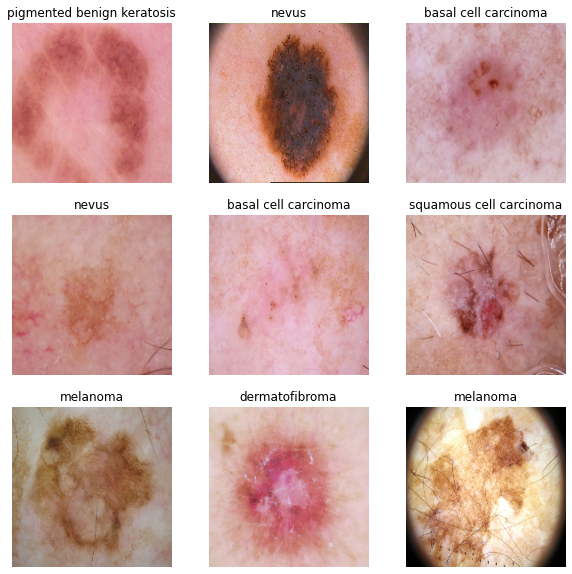

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    x = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [72]:
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(1))
model.add(Dense(9, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

In [83]:
#compiling the model
model.compile(optimizer='adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

In [74]:
#Training the model

epochs = 20
batch_size = 32

history = model.fit(
  train_dataset,
  validation_data=vald_dataset,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 11s 184ms/step - loss: 9.6125 - accuracy: 0.1927 - val_loss: 2.1836 - val_accuracy: 0.1978
Epoch 2/20
57/57 [==============================] - 10s 183ms/step - loss: 2.1717 - accuracy: 0.2082 - val_loss: 2.1648 - val_accuracy: 0.1978
Epoch 3/20
57/57 [==============================] - 10s 182ms/step - loss: 2.1506 - accuracy: 0.2071 - val_loss: 2.1455 - val_accuracy: 0.1978
Epoch 4/20
57/57 [==============================] - 10s 183ms/step - loss: 2.1286 - accuracy: 0.2043 - val_loss: 2.1260 - val_accuracy: 0.1978
Epoch 5/20
57/57 [==============================] - 10s 184ms/step - loss: 2.0667 - accuracy: 0.2038 - val_loss: 2.0928 - val_accuracy: 0.1978
Epoch 6/20
57/57 [==============================] - 10s 183ms/step - loss: 2.0220 - accuracy: 0.2138 - val_loss: 2.0855 - val_accuracy: 0.1978
Epoch 7/20
57/57 [==============================] - 10s 182ms/step - loss: 1.9874 - accuracy: 0.2449 - val_loss: 2.0769 - val_accuracy: 0.1644
Epoch 8/20

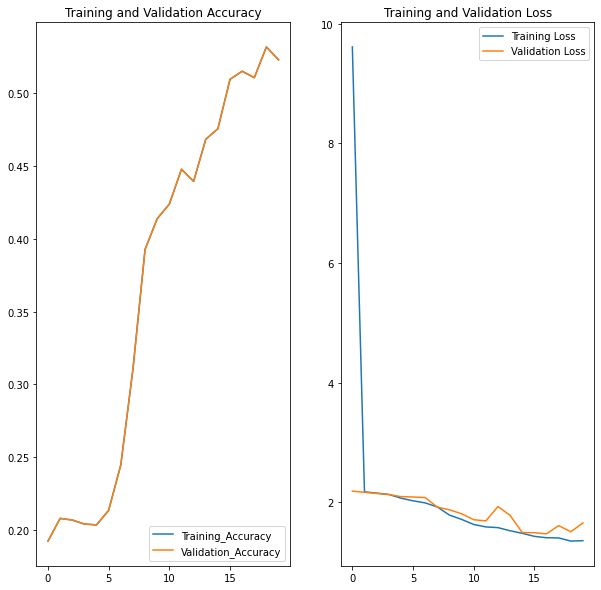

In [75]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training_Accuracy')
plt.plot(epochs_range, acc, label = 'Validation_Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
# From the above model, Accuracy got decreases

In [77]:
# Need to find the distribution of classes in the training datsets
#one class have proportionately higher number of samples compared to others.
# Need to check what is the distributions of classes in the data

<Figure size 864x720 with 0 Axes>

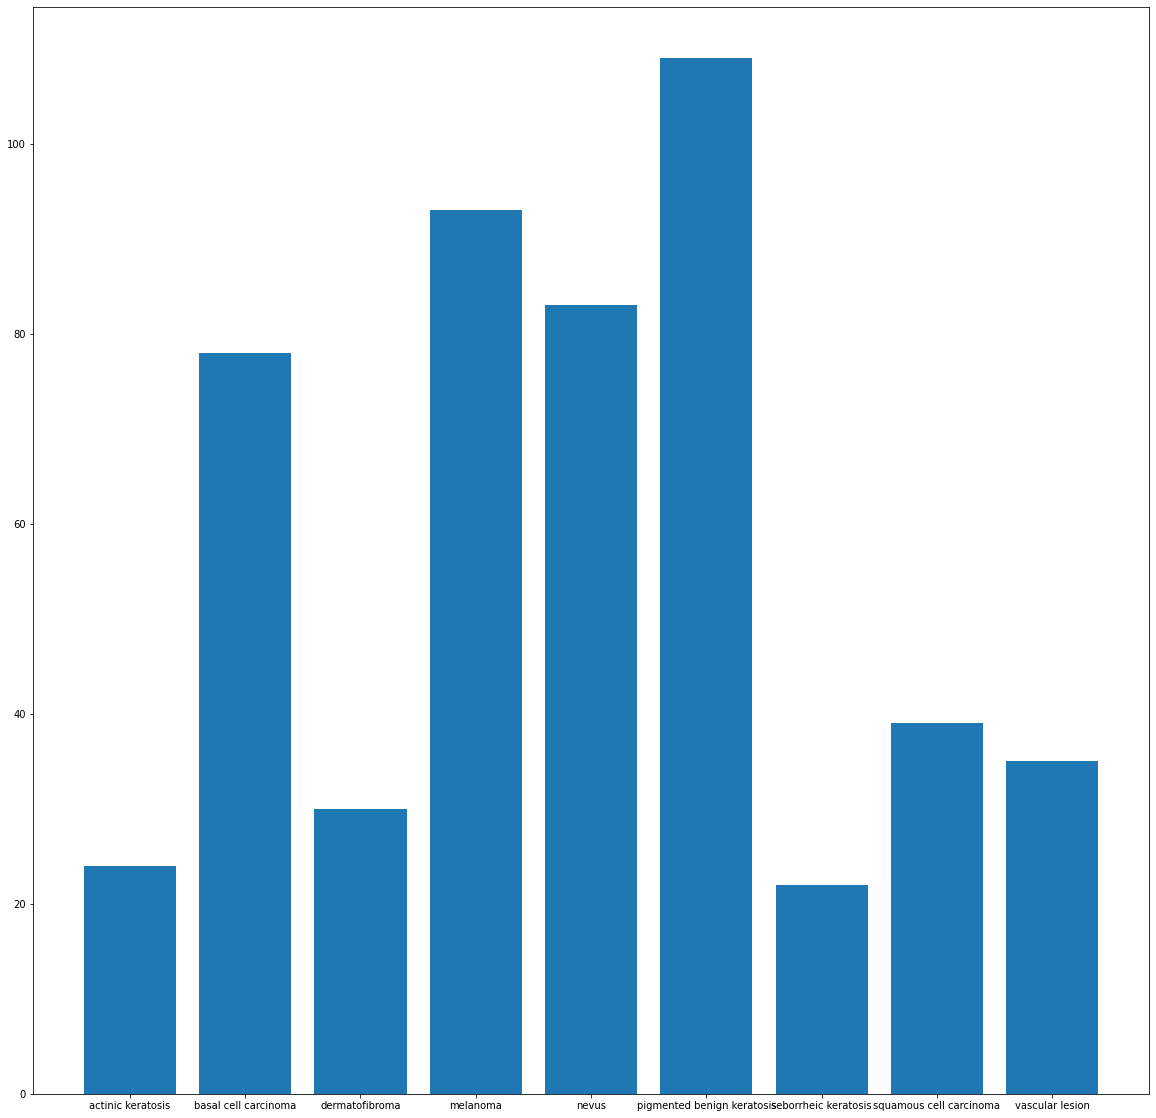

In [78]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(12, 10))
for images, labels in train_dataset:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()




In [79]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
from glob import glob
import Augmentor
path_to_training_dataset="/content/drive/MyDrive/cnn/CNN_assignment/Skin_cancer_images/Train"
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

OSError: ignored

In [99]:
image_count_train = len(list(train_dataset.glob('*/output/*.jpg')))
print(image_count_train)

AttributeError: ignored

In [ ]:
from glob import glob

path_list = [x for x in glob(os.path.join(train_dataset, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_dataset, '*','output', '*.jpg'))]
lesion_list_new

In [88]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))


NameError: ignored

In [89]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

NameError: ignored

In [90]:
new_df['Label'].value_counts()

NameError: ignored

In [91]:
#Train the model on the data created using Augmentor
batch_size = 32
img_height = 180
img_width = 180

In [92]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split=0.2,
    subset="training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size

)

Found 2251 files belonging to 9 classes.
Using 1801 files for training.


In [93]:
vald_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split=0.2,
    subset="validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size

)

Found 2251 files belonging to 9 classes.
Using 450 files for validation.


In [94]:
num_classes = 9
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(1))
model.add(Dense(9, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

In [95]:
#compiling the model
model.compile(optimizer='adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

In [96]:

epochs = 20
batch_size = 32

history = model.fit(
  train_dataset,
  validation_data=vald_dataset,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 20s 301ms/step - loss: 7.4197 - accuracy: 0.1843 - val_loss: 2.1749 - val_accuracy: 0.1978
Epoch 2/20
57/57 [==============================] - 19s 296ms/step - loss: 2.1508 - accuracy: 0.1921 - val_loss: 2.1458 - val_accuracy: 0.1978
Epoch 3/20
57/57 [==============================] - 20s 300ms/step - loss: 2.0461 - accuracy: 0.1999 - val_loss: 2.1423 - val_accuracy: 0.1978
Epoch 4/20
57/57 [==============================] - 19s 299ms/step - loss: 2.0221 - accuracy: 0.1871 - val_loss: 2.1430 - val_accuracy: 0.1978
Epoch 5/20
57/57 [==============================] - 19s 312ms/step - loss: 2.0071 - accuracy: 0.2149 - val_loss: 2.1389 - val_accuracy: 0.1533
Epoch 6/20
57/57 [==============================] - 19s 304ms/step - loss: 1.8842 - accuracy: 0.3215 - val_loss: 2.0136 - val_accuracy: 0.3578
Epoch 7/20
57/57 [==============================] - 19s 299ms/step - loss: 1.7122 - accuracy: 0.3826 - val_loss: 1.8027 - val_accuracy: 0.4600

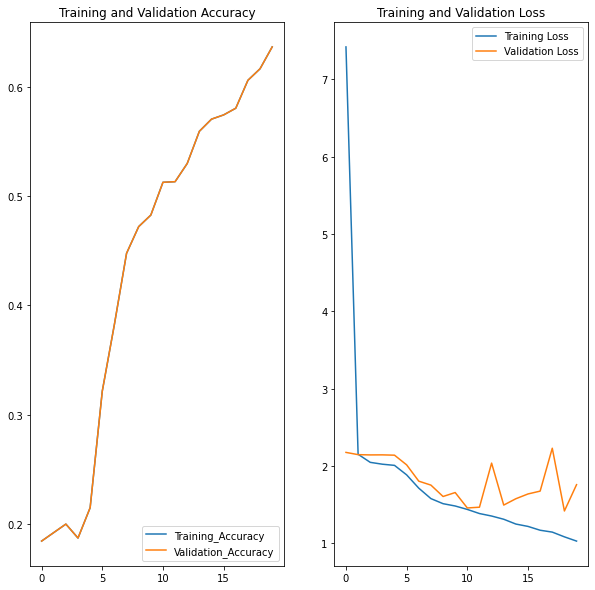

In [97]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training_Accuracy')
plt.plot(epochs_range, acc, label = 'Validation_Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [2]:
# The class rebalance used to help in reduce the overfitting of the data, and model accuracy will be
# Increased. After dropout was created in the data to overfit the high ratio,  As validation accuracy got increased.
# And also the batch normalization and Augmentation.
# Tried to check with another model, But somehow running epochs are taking long time,
# Facing issues with mount the gdrive, due to network issues.